In [14]:
[(k,i,j) for k in range(5) for i in range(frequency) for j in range(i+1)]

[(0, 0, 0),
 (0, 1, 0),
 (0, 1, 1),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 1, 0),
 (1, 1, 1),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 1, 0),
 (2, 1, 1),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (3, 0, 0),
 (3, 1, 0),
 (3, 1, 1),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (4, 0, 0),
 (4, 1, 0),
 (4, 1, 1),
 (4, 2, 0),
 (4, 2, 1),
 (4, 2, 2)]

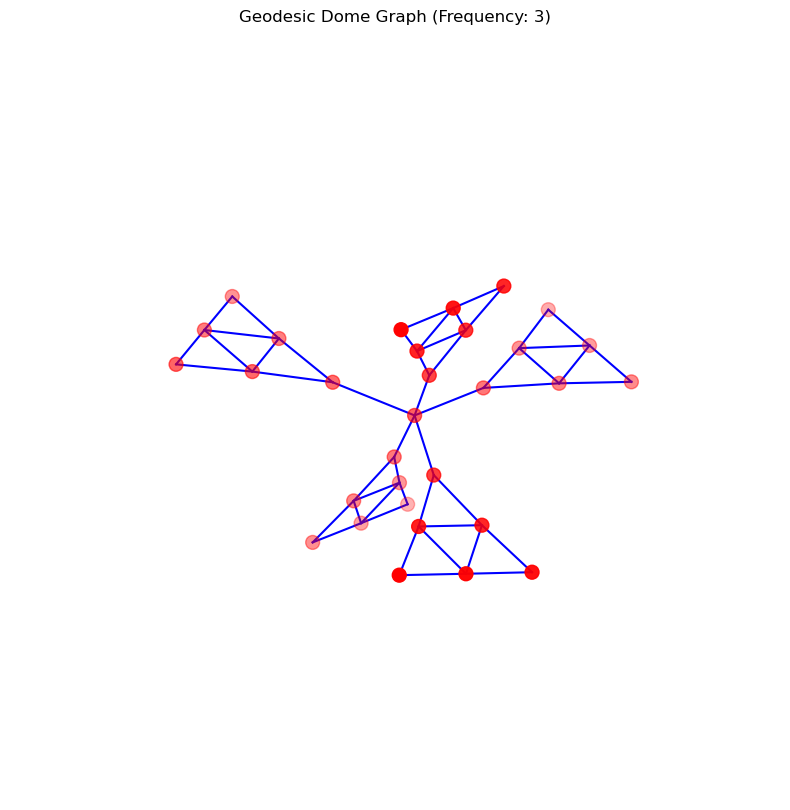

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def geodesic_dome_vertices(frequency):
    vertices = ["center"] + [(k,i,j) for k in range(5) for i in range(frequency) for j in range(i+1)]
    
    return vertices

def create_geodesic_graph(frequency):
    vertices = geodesic_dome_vertices(frequency)
    G = nx.Graph()
    
    for i, v1 in enumerate(vertices):
        for j, v2 in enumerate(vertices[i+1:], start=i+1):
            if (
                (v1 == "center" and v2[1] == 0)
                or (v2 == "center" and v1[1] == 0)
                or (
                    v1 != "center" and v2 != "center" and v1[0] == v2[0]
                    and (
                        (v1[1] == v2[1] and abs(v1[2] - v2[2]) == 1)
                        or (abs(v1[1] - v2[1]) == 1 and v1[2] == v2[2])
                        or (abs(v1[1] - v2[1]) == 1 and (v2[2] - v1[2]) == (v2[1] - v1[1]))
                        )
                   )
                or (
                    v1 != "center" and v2 != "center" and
                    (v2[0] - v1[0]) in [1, 4] and
                    
                   )
               ):
                G.add_edge(i, j)
    
    return G

# Create the geodesic dome graph
frequency = 3
G = create_geodesic_graph(frequency)

# Use Kamada-Kawai layout for 3D visualization
pos = nx.kamada_kawai_layout(G, dim=3)

# Create 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Draw edges
for edge in G.edges():
    x1, y1, z1 = pos[edge[0]]
    x2, y2, z2 = pos[edge[1]]
    ax.plot([x1, x2], [y1, y2], [z1, z2], color='b')

# Draw nodes
x, y, z = zip(*pos.values())
ax.scatter(x, y, z, color='r', s=100)

plt.title(f"Geodesic Dome Graph (Frequency: {frequency})")
plt.axis('off')
plt.show()

In [7]:
G.nodes

50

In [8]:
50-12

38